In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"..\Data\Energy_merged.csv").drop(columns='Unnamed: 0')
data.head()

,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
0,AK,1990,4624985.0,974521.0,54.808483,55.817959,553290.0,71686,1.761320,8.359061,5599506.0,0.174037,0.825963,0.000000
1,AK,1991,4493715.0,896113.0,48.720062,53.505939,570193.0,71482,1.571596,7.881042,5389828.0,0.166260,0.833740,-0.007777
2,AK,1992,4380304.0,918120.0,52.377396,53.505939,588736.0,71791,1.559477,7.440184,5298424.0,0.173282,0.826718,0.007022
3,AK,1993,4418285.0,1302992.0,51.263107,50.661583,599432.0,71917,2.173711,7.370786,5721277.0,0.227745,0.772255,0.054463
4,AK,1994,4621109.0,1345407.0,39.825092,52.200809,603308.0,74443,2.230050,7.659618,5966516.0,0.225493,0.774507,-0.002252


# Define Regression Function

In [116]:
import numpy as np

def ShowRegression(dataframe,x=['year'],y=['green'],polynomial_degree=3,future_prediction_timespan=.3,color='blue'):
    x=dataframe[x]
    y=dataframe[y]
    plt.figure(num="energy regression x={},y={} with ploynomial_degree={}".format(str(x),str(y),str(polynomial_degree)))
    mymodel = np.poly1d(np.polyfit(x, y, polynomial_degree))
    how_far_in_the_future= future_prediction_timespan* (max(x)-min(x)) #.3 times the range of the X array.
    myline = np.linspace(min(x), max(x)+how_far_in_the_future)  # takes the min and max, adds on future prediction to create line
    # this ensures that the regression line will alwyas be plotted using the same domain as x
    
    plot=plt.scatter(x, y,color=color)
    plt.plot(myline, mymodel(myline))
    plt.show()

# Full Set Visualizations

## Yearly Production Levels

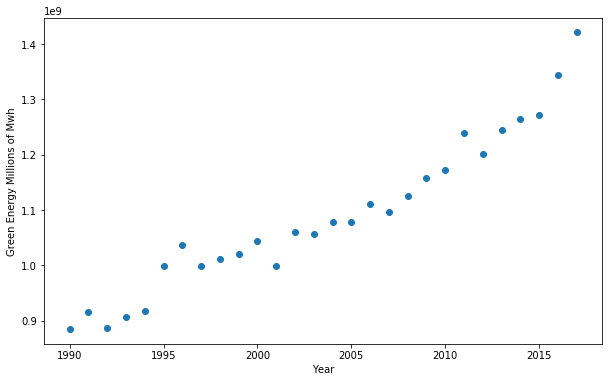

In [44]:
# Change in Green Energy by Year

green_grouped = data.groupby(data.year)

green_energy = pd.DataFrame(green_grouped.green_energy.sum()).reset_index()
green_energy.head()

fix,ax=plt.subplots(figsize=(10,6))
scatter = ax.scatter(green_energy.year,green_energy.green_energy);
ax.set(xlabel='Year', ylabel='Green Energy Millions of Mwh');

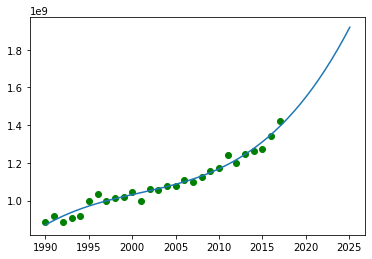

In [118]:
ShowRegression(green_energy, 'year', 'green_energy', color='green')

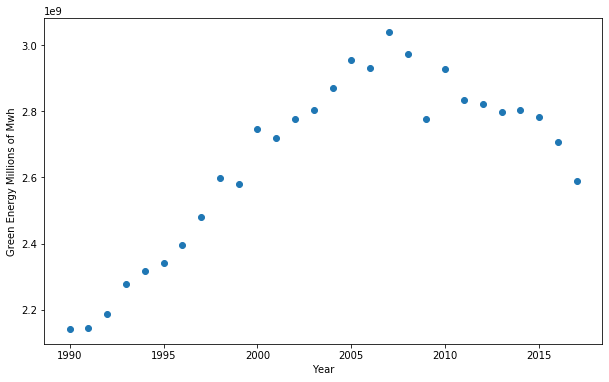

In [52]:
# Conventional energy total over time

conv_grouped = data.groupby(data.year)

conv_energy = pd.DataFrame(conv_grouped.conventional_energy.sum()).reset_index()
conv_energy.head()

fix,ax=plt.subplots(figsize=(10,6))
scatter = ax.scatter(conv_energy.year,conv_energy.conventional_energy);
ax.set(xlabel='Year', ylabel='Green Energy Millions of Mwh');

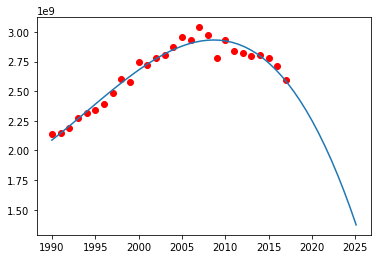

In [119]:
ShowRegression(conv_energy, 'year', 'conventional_energy',color='red')

## Ideology Impacts

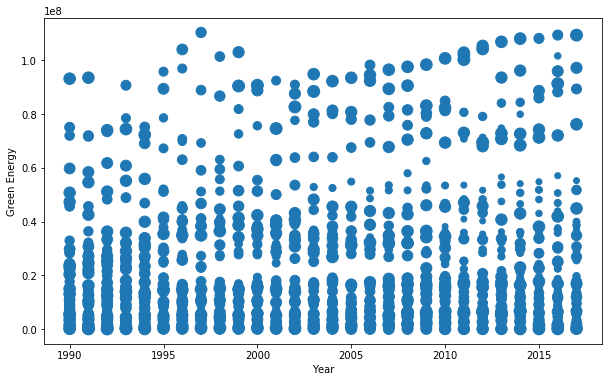

In [53]:
# Green energy per year, sized by ideology

fig, ax = plt.subplots(figsize=(10,6))

scatter = ax.scatter(x=data.year, y=data.green_energy, s=data.gov_ideology*2);
ax.set(xlabel='Year', ylabel='Green Energy');

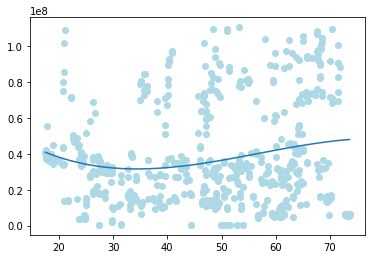

<Figure size 432x288 with 0 Axes>

In [120]:
ShowRegression(population_df, 'gov_ideology', 'green_energy',future_prediction_timespan=.0,color='lightblue')

plt.savefig('../app/static/images/green_energy_.png')

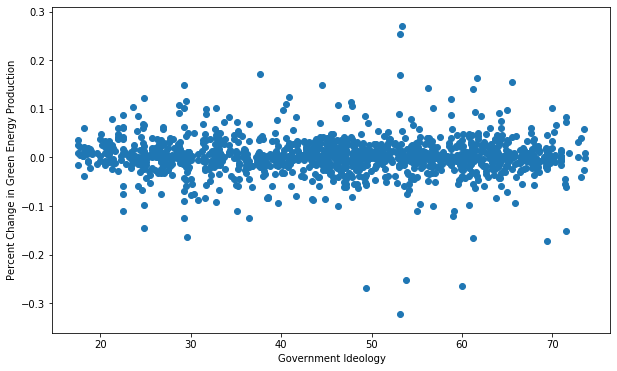

In [121]:
# Percent change in green energy production by government ideology

fix,ax=plt.subplots(figsize=(10,6))
scatter = ax.scatter(x=data.gov_ideology, y=data.perc_change_green);

# data.plot.scatter(x='gov_ideology',y='perc_change_green')
ax.set(xlabel='Government Ideology', ylabel='Percent Change in Green Energy Production');

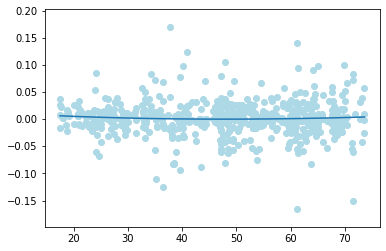

<Figure size 432x288 with 0 Axes>

In [122]:
ShowRegression(population_df_percent_change, 'gov_ideology','perc_change_green',future_prediction_timespan=.0,color='lightblue')
plt.savefig('../app/static/images/green_change_ideology.png')

# Limited-set Visualizaitons

## California

In [123]:
california_df = data.loc[data["state_id"] == "TX"]
california_df.head()

,state_id,year,conventional_energy,green_energy,pop_ideology,gov_ideology,population,median_income,green_per_capita,conv_per_capita,energy_total,perc_green_energy,perc_conv_energy,perc_change_green
1150,TX,1990,263417636.0,17653268.0,35.843048,43.146252,17056755.0,51492,1.034972,15.443596,281070904.0,0.062807,0.937193,0.000000
1151,TX,1991,263598088.0,22024819.0,32.214745,62.208248,17398005.0,48813,1.265939,15.151053,285622907.0,0.077112,0.922888,0.014304
1152,TX,1992,262832410.0,27134925.0,42.266624,62.208248,17759738.0,48007,1.527890,14.799341,289967335.0,0.093579,0.906421,0.016468
1153,TX,1993,285094040.0,14193545.0,34.067841,61.821930,18161612.0,48123,0.781514,15.697618,299287585.0,0.047424,0.952576,-0.046155
1154,TX,1994,276664061.0,30276203.0,29.574076,61.821930,18564062.0,50466,1.630904,14.903207,306940264.0,0.098639,0.901361,0.051214


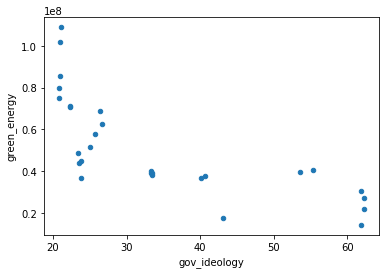

In [124]:
california_df.plot.scatter(x='gov_ideology',y='green_energy')

## High Population

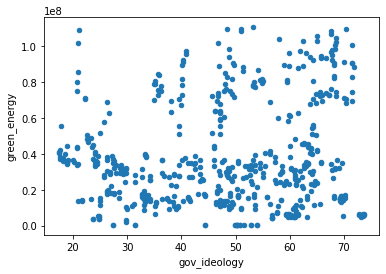

In [6]:
population_df = data.loc[data["population"] > 5000000]

population_df.plot.scatter(x='gov_ideology',y='green_energy')

# Select States Visualizations

In [96]:
# combined_states = data.loc[(data["state_id"] == "TX") | (data["state_id"] == "CA") | (data["state_id"] == "OH") | (data["state_id"] == "FL") |  (data["state_id"] == "PA")  ] 
# combined_states.head()

In [97]:
# combined_states.plot.scatter(x='gov_ideology',y='perc_change_green')

## Population Percent

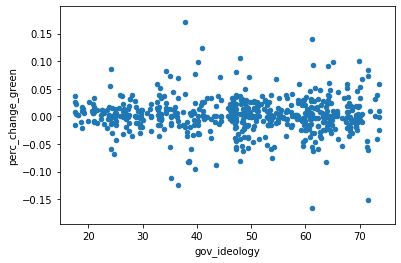

In [12]:
population_df_percent_change = data.loc[data["population"] > 5000000]

population_df_percent_change.plot.scatter(x='gov_ideology',y='perc_change_green')

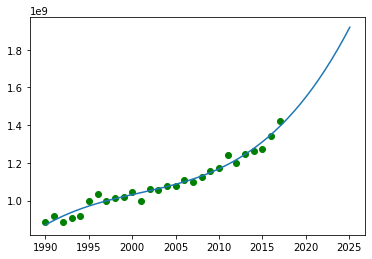

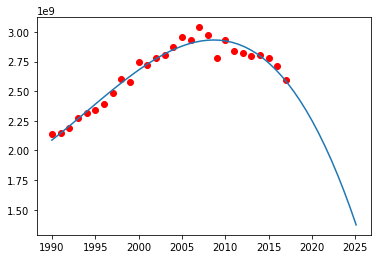

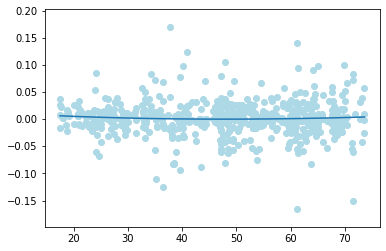

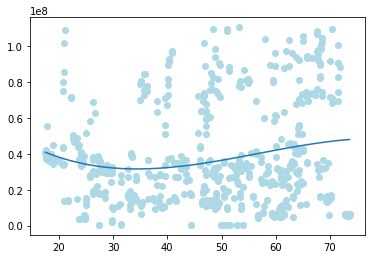